In [6]:
#Importation de librairie necessaire
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Chargement de dataSet et afichage de 5 premier lignes
dataBid = pd.read_csv("bids.csv")
dataTrain = pd.read_csv("train.csv")
dataBid.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
dataTrain.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [40]:
#Information pour chaque données
dataBid.info()
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [41]:
#Verification de la sommes des valeurs null pour chaque dataSet
dataTrain.isna().sum()

bidder_id          0
payment_account    0
address            0
outcome            0
dtype: int64

In [42]:
dataBid.isna().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

## Calculation of :
#### For each auction, the number of unique ip addresses(Pour chaque enchère, le nombre d'adresses IP uniques)

In [16]:
# Regroupement des colonnes a utilisé
uniqueIp = dataBid.groupby('auction')['ip'].nunique().reset_index()
uniqueIp.columns = ['auction', 'uniqueIpCount'] # Creation des nouveaux noms des colonnes
print(uniqueIp)
uniqueIp.head()

      auction  uniqueIpCount
0       00270            771
1       008vv              2
2       00cwr             13
3       00do0              2
4       00hjy             32
...       ...            ...
15046   zznnc              2
15047   zzoy7            196
15048   zztha              3
15049   zzzlx           3519
15050   zzzy7           2085

[15051 rows x 2 columns]


,auction,uniqueIpCount
0,00270,771
1,008vv,2
2,00cwr,13
3,00do0,2
4,00hjy,32


In [44]:
uniqueIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15051 entries, 0 to 15050
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   auction          15051 non-null  object
 1   unique_ip_count  15051 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 235.3+ KB


In [6]:
# Enregistrement du dataset .csv dans le repertoire de travail
uniqueIp.to_csv('question_1.csv', index=False) 

For each merchandise type, the country which sent the maximum number of bids (in the
csv, include also the number of bids sent by that country)
FR : Pour chaque type de marchandise, le pays qui a envoyé le nombre maximum d'offres (dans le
csv, inclure également le nombre d'offres envoyées par ce pays)

In [7]:
# Etape 1:Grouper par "mercendise and country", and compter les bids
bidsCount = dataBid.groupby(['merchandise', 'country']).size().reset_index(name='bid_number')
# Etape 2: Selecte le contry pour le maximum nombre de bid pour chaque type de marchandise
maxBidsMerchandise = bidsCount.loc[bidsCount.groupby('merchandise')['bid_number'].idxmax()]
#Etape 3: Créer un nouveu colonne
bidsCount.columns = ['merchandise', 'country', 'bid_number']
print(maxBidsMerchandise)

           merchandise country  bid_number
14          auto parts      in        2243
101    books and music      in       11820
230           clothing      in        7619
411          computers      th       16731
495          furniture      in       47031
675         home goods      in      169649
861            jewelry      in      560773
1050            mobile      in      578076
1225  office equipment      in       56140
1411    sporting goods      in      346852


In [14]:
# Enregistrer dans le repertoire de travail le dataSet Obtenu en .csv
maxBidsMerchandise.to_csv('question_2.csv', index=False)

The data contains three separate time periods. Calculate average number of unique bidders
per auction in each of the three separate time periods(Les données contiennent trois périodes distinctes. Calculer le nombre moyen d'enchérisseurs uniques par enchère dans chacune des trois périodes distinctes)

In [32]:
# Definition de temps Periode, Diviser chaque les temps en trois quantile selon le seul choisi
timePeriod1 = dataBid['time'] <= dataBid['time'].quantile(1/3)
timePeriod2= (dataBid['time'] > dataBid['time'].quantile(1/3)) & (dataBid['time'] <= dataBid['time'].quantile(2/3))
timePeriod3 = dataBid['time'] > dataBid['time'].quantile(2/3)

#  Calcul unique des soumissionnaires par enchére pour chaque periode
def regrouped_ip(df):
    return df.groupby('auction')['bidder_id'].nunique()

# Commissionnaire unique pour chaque periode
uniqueBidPeriod1 = regrouped_ip(dataBid[timePeriod1])
uniqueBidPeriod2= regrouped_ip(dataBid[timePeriod2])
uniqueBidPeriod3 = regrouped_ip(dataBid[timePeriod3])

# Nombre moyenne de l'unique commisionnaire par enchére pour chaque periode
avguniqueBidPeriod1 = uniqueBidPeriod1.mean()
avguniqueBidPeriod2 = uniqueBidPeriod2.mean()
avguniqueBidPeriod3 = uniqueBidPeriod3.mean()

# Création de nouveux ligne pour le DataSet
results = pd.DataFrame({
    'Time Period': ['Period 1', 'Period 2', 'Period 3'],
    'Average Unique Bidders': [
        avguniqueBidPeriod1,
        avguniqueBidPeriod2,
        avguniqueBidPeriod3
    ]
})

results.to_csv('question_3.csv', index = False)

results

,Time Period,Average Unique Bidders
0,Period 1,22.421917
1,Period 2,21.656447
2,Period 3,17.310961


For each country, the fraction of times a bid from that country was identified as coming from
a robot  (Pour chaque pays, la fraction de fois où une offre de ce pays a été identifiée comme provenant de
un robot)

In [9]:
# Selection de tout les dataSet
dataAll = ['bids.csv','train.csv']
#Concatention  dans un seul dataset appelé df
df = pd.concat([pd.read_csv(data) for data in dataAll],ignore_index=True) 

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658347 entries, 0 to 7658346
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid_id           float64
 1   bidder_id        object 
 2   auction          object 
 3   merchandise      object 
 4   device           object 
 5   time             float64
 6   country          object 
 7   ip               object 
 8   url              object 
 9   payment_account  object 
 10  address          object 
 11  outcome          float64
dtypes: float64(3), object(9)
memory usage: 701.1+ MB


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,0.0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9.759243e+15,us,69.166.231.58,vasstdc27m7nks3,NaN,NaN,NaN
1,1.0,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9.759243e+15,in,50.201.125.84,jmqlhflrzwuay9c,NaN,NaN,NaN
2,2.0,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9.759243e+15,py,112.54.208.157,vasstdc27m7nks3,NaN,NaN,NaN
3,3.0,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9.759243e+15,in,18.99.175.133,vasstdc27m7nks3,NaN,NaN,NaN
4,4.0,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9.759243e+15,in,145.138.5.37,vasstdc27m7nks3,NaN,NaN,NaN


In [31]:
df.isna()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7658342,True,False,True,True,True,True,True,True,True,False,False,False
7658343,True,False,True,True,True,True,True,True,True,False,False,False
7658344,True,False,True,True,True,True,True,True,True,False,False,False
7658345,True,False,True,True,True,True,True,True,True,False,False,False


In [38]:
#Filtrage des données pour identifier les enchères des robots
robotBids = df[df['outcome'] == 1]
# Compter le total de nombre pour le enchere et le robot pour chaque pays
total = df.groupby('country').size()
robot= robotBids.groupby('country').size()
# Calcule de la fraction des enchères des robots pour chaque pays
robotBidsCountry = (robot/ total).reset_index()
#Renomer le colonnes pour bien vue
robotBidsCountry.columns = ['country', 'fraction_robot_bids']
#Remplissage des valeurs NaN avec 0 (s'il existe des pays sans enchères de robots)
robotBidsCountry['fraction_robot_bids'] = robotBidsCountry['fraction_robot_bids'].fillna(0)

robotBidsCountry.to_csv('question_4.csv', index=False)
print(robotBidsCountry)

    country  fraction_robot_bids
0        ad                  0.0
1        ae                  0.0
2        af                  0.0
3        ag                  0.0
4        al                  0.0
..      ...                  ...
194      ye                  0.0
195      za                  0.0
196      zm                  0.0
197      zw                  0.0
198      zz                  0.0

[199 rows x 2 columns]


In [16]:
robotBidsCountry.isna().sum()

country                0
fraction_robot_bids    0
dtype: int64

## Analysis and Visualisation

##### Examinons la corrélation entre les variables de features continues. CalculE de corrélation entre toutes les variables numériques continues 

In [33]:
df.dtypes

bid_id             float64
bidder_id           object
auction             object
merchandise         object
device              object
time               float64
country             object
ip                  object
url                 object
payment_account     object
address             object
outcome            float64
dtype: object

In [11]:
df.dtypes
variablesContinues = ['bid_id', 'time', 'outcome']
dfContinues = df[variablesContinues]
correlationMatrix = dfContinues.corr()
print("Matrice de Corrélation des Variables Numériques Continues :")
print(correlationMatrix)

Matrice de Corrélation des Variables Numériques Continues :
          bid_id     time  outcome
bid_id   1.00000 -0.41219      NaN
time    -0.41219  1.00000      NaN
outcome      NaN      NaN      1.0


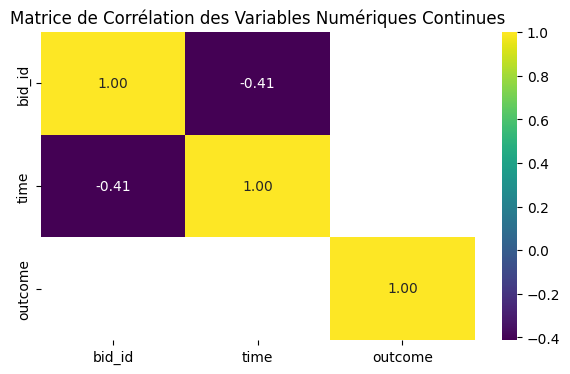

In [12]:

plt.figure(figsize=(7, 4))
sns.heatmap(correlationMatrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Matrice de Corrélation des Variables Numériques Continues')
plt.show()

#### Les top 15 enchere par nombre d'IP unique

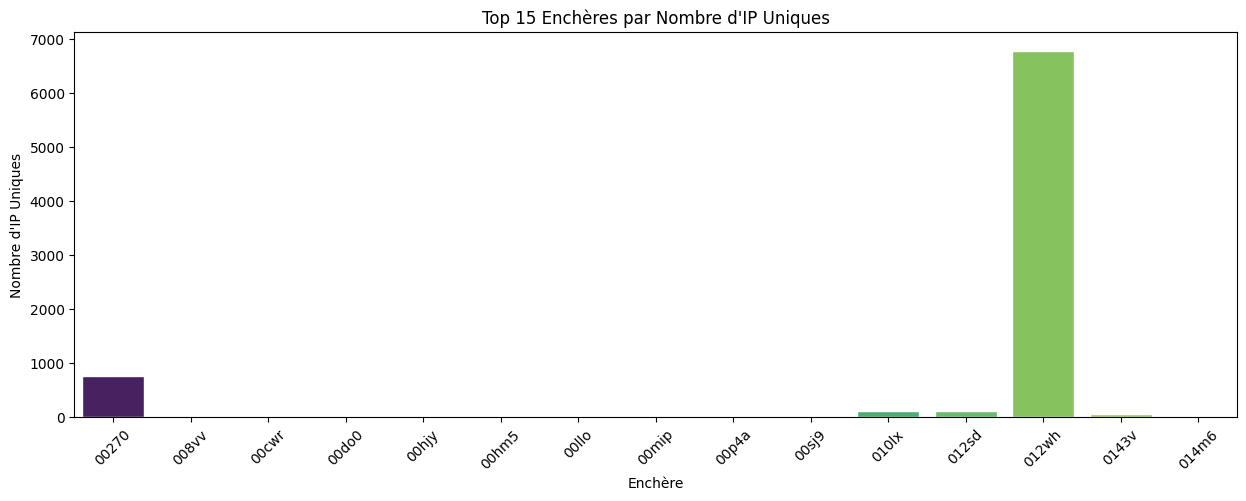

In [30]:
# Limiter à 10 premières enchères pour une meilleure lisibilité
topAuctions = uniqueIp.head(15)

# Créer le barplot
plt.figure(figsize=(15, 5))
barplot = sns.barplot(x='auction', y='uniqueIpCount', data=topAuctions, hue= 'auction', palette='viridis', edgecolor='w')

# Personnaliser le graphique
plt.title('Top 15 Enchères par Nombre d\'IP Uniques')
plt.xlabel('Enchère')
plt.ylabel('Nombre d\'IP Uniques')
plt.xticks(rotation=45)  # Rotation des étiquettes des x pour une meilleure lisibilité

# Afficher le graphique
plt.show()

#### Le nombre moyen d'enchérisseurs uniques

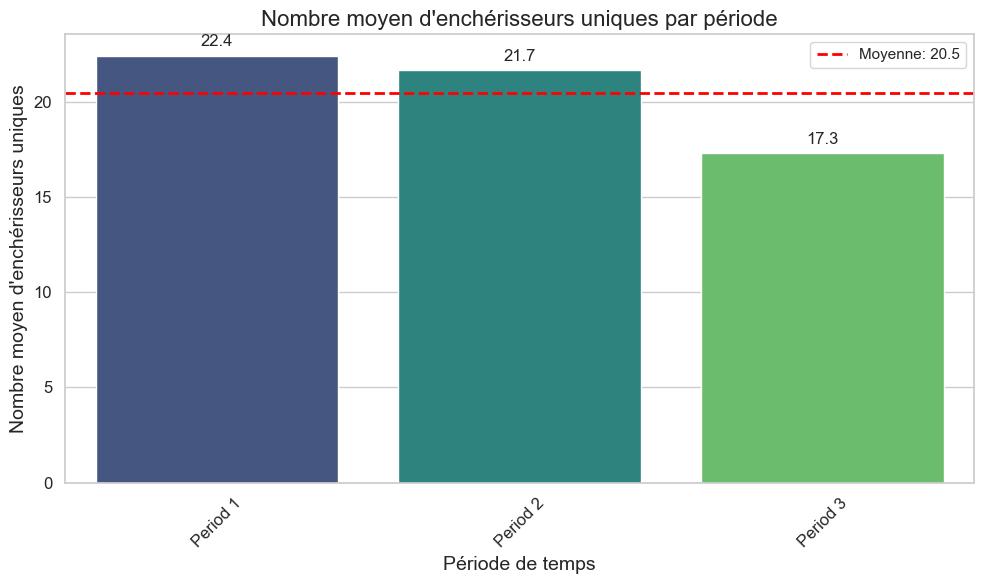

In [33]:
# Style général
sns.set(style="whitegrid")

# Barplot avec annotations et personnalisation
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Time Period', y='Average Unique Bidders', data=results, hue='Time Period', palette='viridis', dodge=False)

# Ajout des annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Ajout de la ligne de moyenne générale
mean_val = results['Average Unique Bidders'].mean()
plt.axhline(mean_val, color='red', linewidth=2, linestyle='--', label=f'Moyenne: {mean_val:.1f}')

# Personnalisation des labels et du titre
plt.title('Nombre moyen d\'enchérisseurs uniques par période', fontsize=16)
plt.xlabel('Période de temps', fontsize=14)
plt.ylabel('Nombre moyen d\'enchérisseurs uniques', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

# Amélioration de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()